In [44]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [45]:
#eval
sum([1,2,3])
myString='sum'
fun=eval(myString)
fun([6,8,9,9])

32

In [46]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [107]:
fullImage=cv2.imread("../Computer-Vision-with-Python/DATA/sammy.jpg")
fullImage=cv2.cvtColor(fullImage,cv2.COLOR_BGR2RGB)
face=cv2.imread("../Computer-Vision-with-Python/DATA/sammy_face.jpg")
# face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

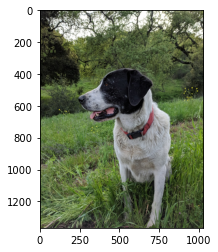

In [108]:
plt.imshow(fullImage)

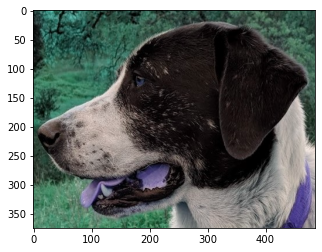

In [109]:
plt.imshow(face)

In [110]:
res=cv2.matchTemplate(fullImage,face,eval('cv2.TM_CCOEFF'))

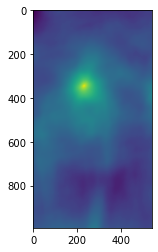

In [111]:
plt.imshow(res)

# cv2.TM_SQDIFF , cv2.TM_SQDIFF_NORMED
topLeft =minLoc
# FOR OTHERS
topLeft=maxLoc

In [112]:
minVal,maxVal,minLoc,maxLoc=cv2.minMaxLoc(res)

In [113]:
height,width,channels=face.shape

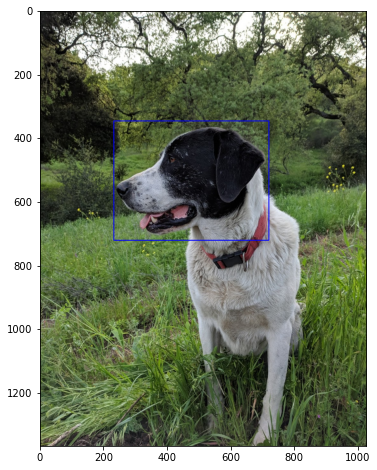

In [114]:
plt.figure(figsize=(15,8))
copyImage=fullImage.copy()
leftCorner=maxLoc
rightCorner=(maxLoc[0]+width,maxLoc[1]+height)
plt.imshow(cv2.rectangle(copyImage,maxLoc,rightCorner,(0,0,255),2))

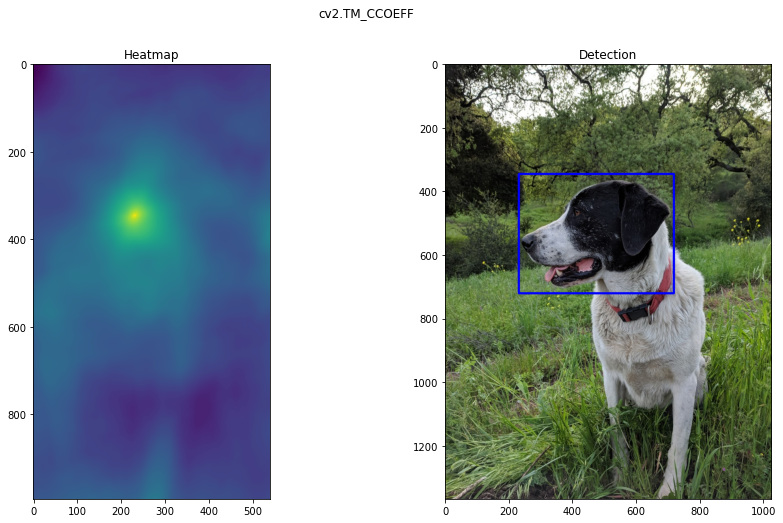

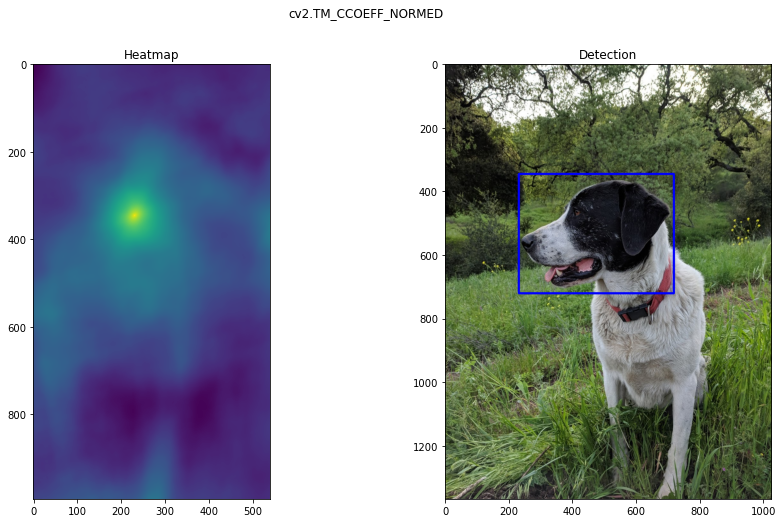

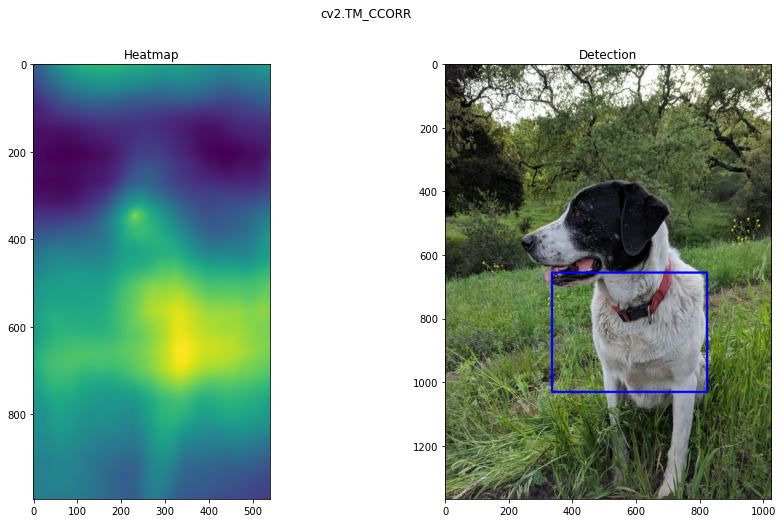

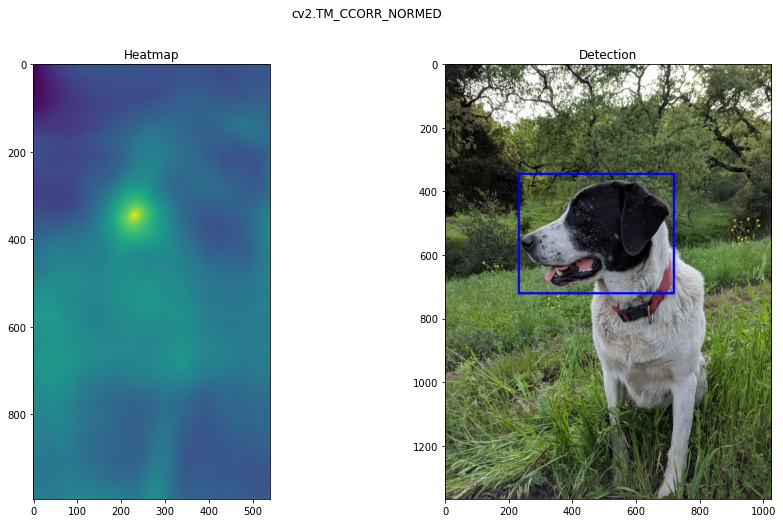

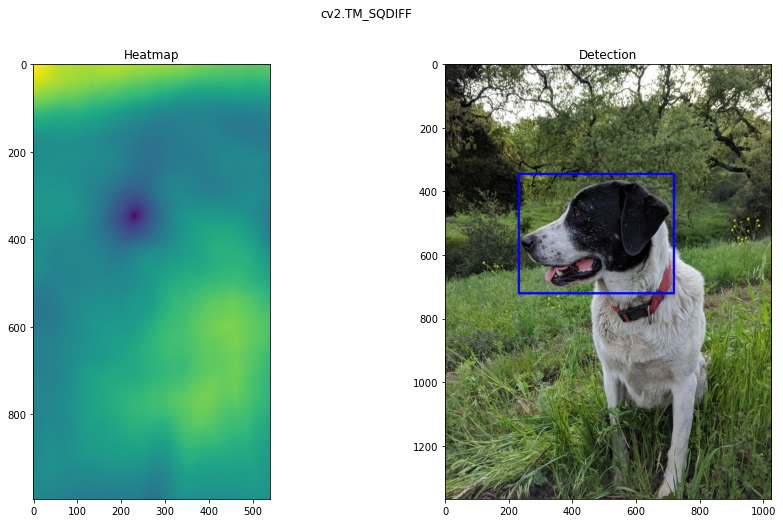

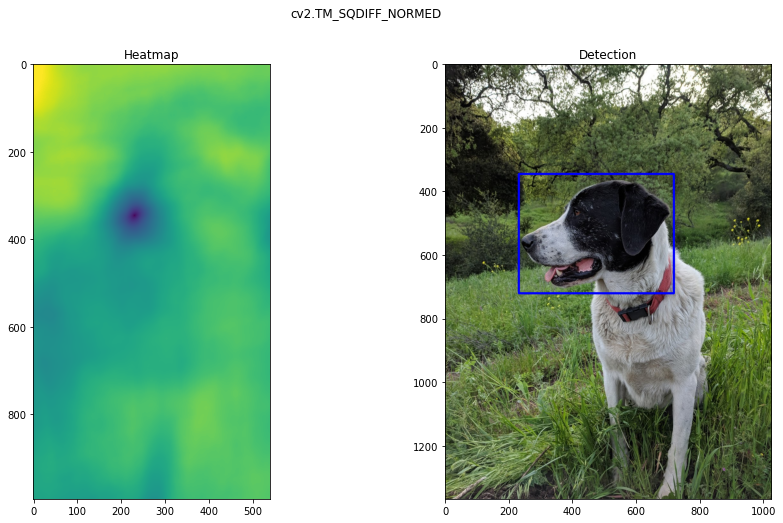

In [115]:
for fun in methods:
    res=cv2.matchTemplate(fullImage,face,eval(fun))
    minValue,maxValue,minLoc,maxLoc=cv2.minMaxLoc(res)
    copyImg=fullImage.copy()
    height,width,channels=face.shape
    if fun in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        topLeft=minLoc
    else:
        topLeft=maxLoc
    bottomRight=topLeft[0]+width,topLeft[1]+height
    
    cv2.rectangle(copyImg,topLeft,bottomRight,(0,0,255),5)
    
    plt.figure(figsize=(15,8))
    plt.suptitle(fun)
    plt.subplot(121)
    plt.title("Heatmap")
    plt.imshow(res)
    
    plt.subplot(122)
    plt.title("Detection")
    plt.imshow(copyImg)
    plt.show()